<a href="https://colab.research.google.com/github/atiryunuskhan/EDA-theory/blob/main/Module2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Atir Yunus Khan

import pandas as pd
from scipy.stats import chi2_contingency

# Example data: categorical variables A and B
data = {'A': ['X', 'X', 'Y', 'Y', 'Z', 'Z', 'X'],
        'B': ['M', 'N', 'M', 'M', 'N', 'M', 'N']}

df = pd.DataFrame(data)

# Contingency table
contingency_table = pd.crosstab(df['A'], df['B'])
print("Contingency Table:\n", contingency_table)

# Chi-square test for independence (global measure of association)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")


Contingency Table:
 B  M  N
A      
X  1  2
Y  2  0
Z  1  1

Chi2: 2.2361111111111107, p-value: 0.32691484476680416, Degrees of Freedom: 2


In [2]:
# Row profiles
row_profiles = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("\nRow Profiles:\n", row_profiles)

# Column profiles
col_profiles = contingency_table.div(contingency_table.sum(axis=0), axis=1)
print("\nColumn Profiles:\n", col_profiles)

# Relative frequencies (whole table / grand total)
relative_frequencies = contingency_table / contingency_table.sum().sum()
print("\nRelative Frequencies:\n", relative_frequencies)

# Independence ratios (observed / expected)
independence_ratios = contingency_table / expected
print("\nIndependence Ratios:\n", independence_ratios)

# Contributions (how much each cell contributes to Chi-square statistic)
contributions = (contingency_table - expected) ** 2 / expected
print("\nContributions:\n", contributions)



Row Profiles:
 B         M         N
A                    
X  0.333333  0.666667
Y  1.000000  0.000000
Z  0.500000  0.500000

Column Profiles:
 B     M         N
A                
X  0.25  0.666667
Y  0.50  0.000000
Z  0.25  0.333333

Relative Frequencies:
 B         M         N
A                    
X  0.142857  0.285714
Y  0.285714  0.000000
Z  0.142857  0.142857

Independence Ratios:
 B         M         N
A                    
X  0.583333  1.555556
Y  1.750000  0.000000
Z  0.875000  1.166667

Contributions:
 B         M         N
A                    
X  0.297619  0.396825
Y  0.642857  0.857143
Z  0.017857  0.023810


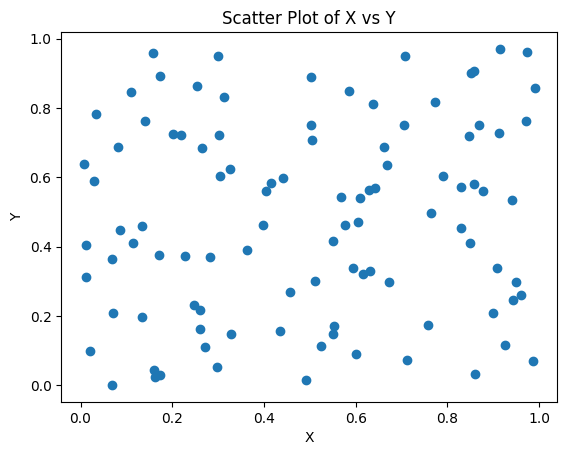

Pearson Correlation Coefficient: 0.11364939926216895


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Example data: quantitative variables X and Y
data = {'X': np.random.rand(100),
        'Y': np.random.rand(100)}

df = pd.DataFrame(data)

# Scatter plot
plt.scatter(df['X'], df['Y'])
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Correlation
corr, _ = pearsonr(df['X'], df['Y'])
print(f"Pearson Correlation Coefficient: {corr}")



Group-wise Mean of X:
 A
Group1    2.0
Group2    4.0
Group3    6.0
Name: X, dtype: float64


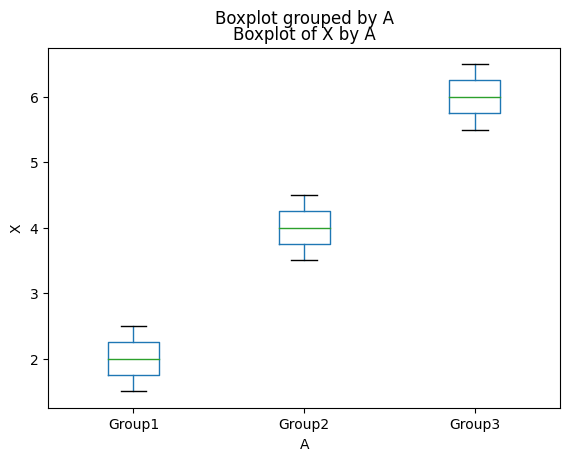

In [4]:
# Example data: quantitative variable X and categorical variable A
data = {'A': ['Group1', 'Group1', 'Group2', 'Group2', 'Group3', 'Group3'],
        'X': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]}

df = pd.DataFrame(data)

# Group-wise summary (mean of X for each group)
group_summary = df.groupby('A')['X'].mean()
print("\nGroup-wise Mean of X:\n", group_summary)

# Boxplot to visualize distribution of X for each category in A
df.boxplot(column='X', by='A', grid=False)
plt.title("Boxplot of X by A")
plt.xlabel("A")
plt.ylabel("X")
plt.show()



Group-wise Mean of X:
 B       Subgroup1  Subgroup2
A                           
Group1        1.5        2.5
Group2        3.5        4.5
Group3        5.5        6.5


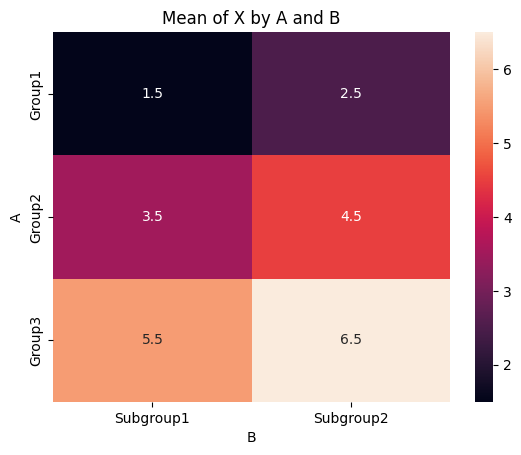

In [5]:
# Example data: quantitative variable X, categorical variables A and B
data = {'A': ['Group1', 'Group1', 'Group2', 'Group2', 'Group3', 'Group3'],
        'B': ['Subgroup1', 'Subgroup2', 'Subgroup1', 'Subgroup2', 'Subgroup1', 'Subgroup2'],
        'X': [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]}

df = pd.DataFrame(data)

# Group-wise summary (mean of X for each combination of A and B)
group_summary = df.groupby(['A', 'B'])['X'].mean().unstack()
print("\nGroup-wise Mean of X:\n", group_summary)

# Heatmap to visualize the means
import seaborn as sns

sns.heatmap(group_summary, annot=True)
plt.title("Mean of X by A and B")
plt.show()
